In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

2025-11-13 15:31:54.503326: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-13 15:31:54.559602: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-13 15:31:55.765866: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
df=pd.read_csv("ann_classification_dataset.csv")
df

,Age,Income,SpendingScore,Tenure,Balance,Churn
0,56,25408,88,7,85679,1
1,69,79379,42,1,2103,0
2,46,45053,72,4,65901,0
3,32,29446,24,2,44535,0
4,60,20922,80,2,16103,0
...,...,...,...,...,...,...
1195,59,29435,25,5,4078,0
1196,69,114088,91,3,78389,0
1197,32,72249,46,5,50519,0
1198,64,57384,87,8,4042,0


In [3]:
df.isnull().sum()

Age              0
Income           0
SpendingScore    0
Tenure           0
Balance          0
Churn            0
dtype: int64

In [4]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [5]:
X

array([[    56,  25408,     88,      7,  85679],
       [    69,  79379,     42,      1,   2103],
       [    46,  45053,     72,      4,  65901],
       ...,
       [    32,  72249,     46,      5,  50519],
       [    64,  57384,     87,      8,   4042],
       [    46, 101929,     30,      2,  49052]], shape=(1200, 5))

In [6]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [7]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [9]:

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


In [10]:
ann=tf.keras.models.Sequential()

In [11]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [12]:

ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [13]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [14]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

2025-11-13 15:32:09.321985: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [15]:
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0312 - loss: 28381.0586
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0312 - loss: 18632.8652 
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0312 - loss: 11279.6494     
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1229 - loss: 5449.6792     
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4594 - loss: 2436.2952 
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6344 - loss: 1301.2924
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7177 - loss: 748.7859 
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7552 - loss: 470.0348 
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7896 - loss: 295.6566 
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8281 - loss: 199.0224 
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8427 - loss: 142.9935
Epoch 12/100
30/

In [16]:
y_pred=ann.predict(X_test)
y_pred=(y_pred>0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
[[0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0

In [18]:

from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[232   0]
 [  8   0]]


0.9666666666666667

In [19]:
print(ann.predict(sc.transform([[25,240000,10,1,500000]]))>0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[False]]


In [20]:
print(ann.predict(sc.transform([[78,2400,80,8,5000]]))>0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[False]]


Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9698 - loss: 0.1389 - val_accuracy: 0.9667 - val_loss: 0.1571
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9698 - loss: 0.1388 - val_accuracy: 0.9667 - val_loss: 0.1569
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9698 - loss: 0.1387 - val_accuracy: 0.9667 - val_loss: 0.1568
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9698 - loss: 0.1386 - val_accuracy: 0.9667 - val_loss: 0.1566
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9698 - loss: 0.1384 - val_accuracy: 0.9667 - val_loss: 0.1565
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9698 - loss: 0.1383 - val_accuracy: 0.9667 - val_loss: 0.1563
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9698 - loss: 0.1382 - val_accuracy: 0.9667 - val_loss: 0.1562
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9698 - loss: 0.1381 - val_accuracy: 0.9667 - val_loss:

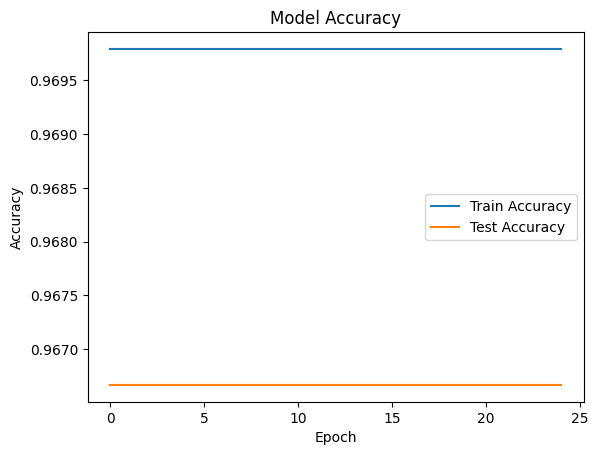

In [22]:
import matplotlib.pyplot as plt

history = ann.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
